In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
### 1. Import the raw data ###
cars=pd.read_csv('Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [31]:
### 2. Clean the data and remove missing values ###
# Remove missing values  - I removed any row that has any NaN value
# Try out imputing missing values rather than removing them?
cars.dropna(axis=0,inplace=True)

# Drop any column that is not categorical or numeric 
# (all model and make are categroical and are unique for each row, so they would give no useful info)
cars.drop(columns=['Model','Make','Unnamed: 0'],inplace=True,errors='ignore')

# Manufacturer - Chrysler was misspelled (Chrylser)
cars.replace('Chrylser','Chrysler',inplace=True)

# Outliers - None that need to be worried about
cat_cols=list(cars.select_dtypes('object').columns)
outliers={} #A dictionary to easily see which columns have outliers and what values the outliers are
for column in cars.columns:
    if column in cat_cols:
        continue
    else:
        minflag=cars[column].mean()-3*cars[column].std()
        maxflag=cars[column].mean()+3*cars[column].std()
        if cars[column].min()<minflag or cars[column].max()>maxflag:            
            outliers[column]=cars[(cars[column]>maxflag)|(cars[column]<minflag)][column].sort_values().values
            print(f"Nonoutlier range in {column}: ({round(minflag,2)}, {round(maxflag,2)})")
            print('Outlier List:')
            print(outliers[column])
            print('')
        else:
            continue

# Consider removing Manufacturer?
cars.info()

Nonoutlier range in Min.Price: (-9.94, 43.59)
Outlier List:
[43.8 45.4]

Nonoutlier range in Price: (-10.71, 49.05)
Outlier List:
[61.9]

Nonoutlier range in Max.Price: (-12.82, 55.85)
Outlier List:
[80.]

Nonoutlier range in MPG.city: (6.3, 39.87)
Outlier List:
[42 46]

Nonoutlier range in MPG.highway: (14.94, 45.01)
Outlier List:
[46 50]

Nonoutlier range in EngineSize: (-0.42, 5.6)
Outlier List:
[5.7]

Nonoutlier range in Horsepower: (-13.21, 293.12)
Outlier List:
[295 300]

Nonoutlier range in Rear.seat.room: (19.01, 36.06)
Outlier List:
[19.]

Nonoutlier range in Manufacturer_Audi: (-0.44, 0.49)
Outlier List:
[1 1]

Nonoutlier range in Manufacturer_BMW: (-0.32, 0.34)
Outlier List:
[1]

Nonoutlier range in Manufacturer_Buick: (-0.6, 0.7)
Outlier List:
[1 1 1 1]

Nonoutlier range in Manufacturer_Cadillac: (-0.44, 0.49)
Outlier List:
[1 1]

Nonoutlier range in Manufacturer_Chevrolet: (-0.66, 0.78)
Outlier List:
[1 1 1 1 1]

Nonoutlier range in Manufacturer_Chrysler: (-0.53, 0.6)
Outl

In [4]:
### 3. Generate dummy variables for the categorical features ###
cars = pd.get_dummies(cars, drop_first=True)

In [5]:
### 4. Create a training set that's 75% of your dat set and a complementary test set with the remaining 25%. Specify random_state = 0 ###
X = cars.drop('MPG.highway',axis=1)
y = cars['MPG.highway']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
### 5. Train the model using the LinearRegression class. Leave all parameters at their default values ###
reg = LinearRegression().fit(X_train,y_train)

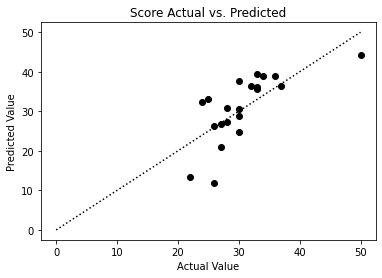

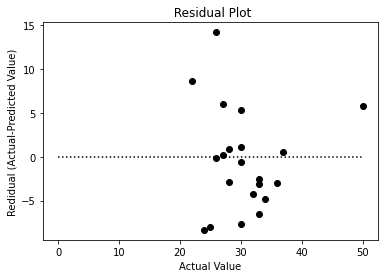

In [7]:
### 6. Use your model to generate predictions on the test set and create two scatter plots ###

# Scatterplot with predicted values against actual values
fig=plt.figure()
ax=plt.axes()

x=np.linspace(0,max(y_test),1000)
ax.plot(x,x,color='black',linestyle='dotted')

y_predict=reg.predict(X_test)
plt.scatter(x=y_test,y=y_predict,c='black')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Score Actual vs. Predicted')

# Scatterplot with predicted values against actual values
fig2=plt.figure()
ax2=plt.axes()

ax2.plot(x,x*0,color='black',linestyle='dotted')

y_residual=y_test-y_predict
plt.scatter(x=y_test,y=y_residual,c='black')
plt.xlabel('Actual Value')
plt.ylabel('Redidual (Actual-Predicted Value)')
plt.title(' Residual Plot')
plt.show()

In [8]:
### 7. Print out the actual model in equation form ###

equation=f"MPG.highway = {reg.intercept_:.3f}"
columns=""
for index, col in enumerate(X_train.columns):
    equation+=f" + {reg.coef_[index]:.3f} * {col}"
print(equation)

print('\nScore/Coefficient of Determination: ',reg.score(X_test,y_test))

MPG.highway = 16.744 + 22.503 * Min.Price + -45.625 * Price + 22.772 * Max.Price + 1.238 * MPG.city + -1.941 * EngineSize + -0.011 * Horsepower + 0.001 * RPM + -0.003 * Rev.per.mile + 0.302 * Fuel.tank.capacity + 1.549 * Passengers + 0.082 * Length + -0.375 * Wheelbase + -0.415 * Width + 0.611 * Turn.circle + -0.746 * Rear.seat.room + 0.828 * Luggage.room + 0.004 * Weight + -3.517 * Manufacturer_Audi + 7.652 * Manufacturer_BMW + -1.994 * Manufacturer_Buick + 11.630 * Manufacturer_Cadillac + -0.159 * Manufacturer_Chevrolet + -1.520 * Manufacturer_Chrysler + -1.712 * Manufacturer_Dodge + -4.100 * Manufacturer_Eagle + -1.457 * Manufacturer_Ford + -6.057 * Manufacturer_Geo + -5.808 * Manufacturer_Honda + -3.338 * Manufacturer_Hyundai + -0.000 * Manufacturer_Infiniti + 5.704 * Manufacturer_Lexus + 2.174 * Manufacturer_Lincoln + -2.683 * Manufacturer_Mazda + 9.194 * Manufacturer_Mercedes-Benz + -8.174 * Manufacturer_Mercury + -8.511 * Manufacturer_Mitsubishi + -5.790 * Manufacturer_Nissan + 

In [37]:
from sklearn.ensemble import RandomForestRegressor
# Optimization
    # n_estimators (1,1000)
    # max_featrures (1,62)
    # mini_sample_leaf ()
    # oof_score=True
# n_estimators=[1,10,100,1000]
# error=[]

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0,oob_score=True)
regressor.fit(X_train, y_train)
y_predict_forest = regressor.predict(X_test)

MSE_forest=0
MSE_lin=0
for i in range(len(y_predict_forest)):
    MSE_forest += (list(y_test)[i]-y_predict_forest[i])**2/len(y_test)
    MSE_lin += (list(y_test)[i]-y_predict[i])**2/len(y_test)
print(f"The MSE for forest was {MSE_forest:.2f} and the MSE for linear regression was {MSE_lin:.2f}")
print(regressor.n_features_in_)



The MSE for forest was 5.71 and the MSE for linear regression was 32.69
61


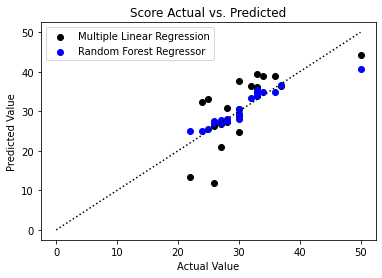

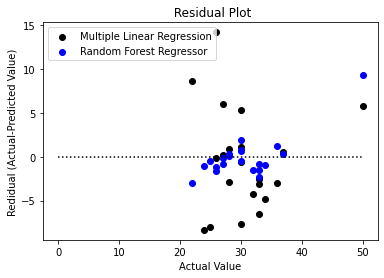

In [42]:
### 6. Use your model to generate predictions on the test set and create two scatter plots ###

# Scatterplot with predicted values against actual values
fig=plt.figure()
ax=plt.axes()

x=np.linspace(0,max(y_test),1000)
ax.plot(x,x,color='black',linestyle='dotted')

plt.scatter(x=y_test,y=y_predict,c='black',label='Multiple Linear Regression')
plt.scatter(x=y_test,y=y_predict_forest,c='blue', label='Random Forest Regressor')
plt.legend()
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Score Actual vs. Predicted')

# Scatterplot with predicted values against actual values
fig2=plt.figure()
ax2=plt.axes()

ax2.plot(x,x*0,color='black',linestyle='dotted')

y_residual=y_test-y_predict
y_residual_forest=y_test-y_predict_forest
plt.scatter(x=y_test,y=y_residual,c='black',label='Multiple Linear Regression')
plt.scatter(x=y_test,y=y_residual_forest,c='blue',label='Random Forest Regressor')
plt.legend()
plt.xlabel('Actual Value')
plt.ylabel('Redidual (Actual-Predicted Value)')
plt.title(' Residual Plot')
plt.show()